# Final Group Project 

This dataset is one of the sample datasets obtained from IBM. It contains the results of an auto insurance company's marketing campaign which offers customers with expiring policies one of four different renewal proposals to retain them.  The data has 9134 customer records with 24 variables. The policies for all customers expire between Jan 1 to Feb 28, 2011. 

Link to the dataset: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data

The main objective of the analysis is to build a regression model to predict the customer lifetime value and a classfication model to determine if a customer will accept or reject the renewal offer. If the renewal acceptance rate is low, clutsering analysis will be performed to determine the attributes that can lead to more consumers opting for renewal. Moreover, the analysis will try to pair the customer with the one of four renewal offers so that they are more liely to accept the offer.

# Importing required libraries 

In [131]:
#load libraries 

import pandas as pd 
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#install pandas-profiling if needed
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

#***Need to figure out table of contents 
#!pip install jupyter_contrib_nbextensions
#!pip install jupyter_nbextensions_configurator
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable toc2/main
#!jupyter labextension install @jupyterlab/toc

import pandas_profiling as pp
from pandas_profiling import ProfileReport

from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from sklearn.preprocessing import LabelEncoder


# Loading the dataset into dataframe 

In [132]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   
3                            65                         0                   7   
4                            44                         0                   1   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   
3  Corporate Auto  Corporate L2            Offer1    Call Center   
4   Personal Auto   Personal L1            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  
3         529.881344            SUV      Medsize  
4         138.130879  Four-Door Car      Medsize  

[5 rows x 24 columns]

## Data Dictionary 

In [133]:
df_dictionary = pd.read_csv(r"C:\Users\shiva\Downloads\DataDictionary.csv").dropna()
df_dictionary.style.set_properties(subset=['Description'], **{'width': '500px'})

## Checking the dimensions

In [134]:
df.shape

(9134, 24)

## Check the datatypes 

In [135]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

## Checking the column names

In [49]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## Profile data using pandas_profiling

In [50]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Key insights from the profile report

- There are no missing values 
- Policy and  Policy Type are highly correlated (will be further explored)
- Around 15%  of the customers accepted the renewal offer (will be further explored)

# Data Exploration


## Count of columns with specific datatype

In [136]:
dtype = pd.DataFrame(df.dtypes.value_counts().sort_values(), columns =  ['Count'])
dtype

Count
float64      2
int64        6
object      16

TypeError: Cannot cast Index to dtype int32

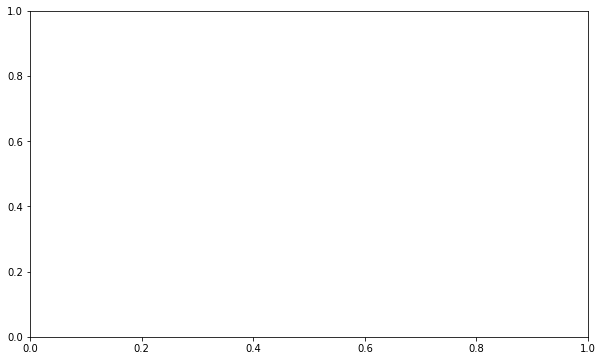

In [137]:
# Count of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh',figsize=(10, 6),fontsize=12)
plt.title('Number of columns by data types', fontsize=12)
plt.xlabel('Number of columns', fontsize=12)
plt.ylabel('Data type', fontsize=12)

## Descriptive statistics


In [138]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

## Checking for missing values

In [139]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)

Dataframe has 24 columns.
There are 0 columns that have missing values.


## Target Variables 

Since there are two models, regression and classification, there are two target variables. The target variable for regression model is Customer Lifetime Value and target variable for classfication variable is reponse. 

### Analyzing the response variable (target variable for classification model)

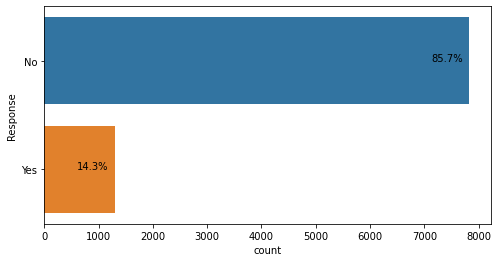

In [140]:
#checking to see if the data is imablanced by looking at the distrbution of the target variable 
fig = plt.figure(figsize=(8, 4))
ax = sns.countplot(y="Response", data=df)
total = len(df['Response'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()-700 
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

As it can be seen above that the data is highly imbalanced, with only 14.3% actually accepting the renewal offers, Hence, before training the model, sampling techniques will be used to address this problem. 

### Analyzing the Customer Lifetime Value (target variable for regression model)

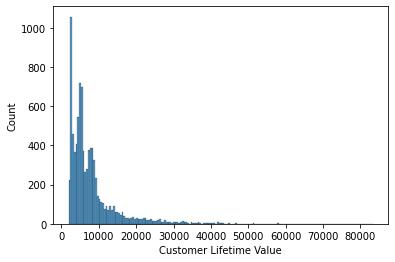

In [141]:
#plotting histogram to visualize their distribution 
sns.histplot(df['Customer Lifetime Value'])
plt.show()

As it can be seen from teh above plot, the distribution of CLV is skewed towards right. 

### Creating the target variable 

In [142]:
le = LabelEncoder()
df['Response'] = le.fit_transform(df['Response'])
# 1 is when Response is yes 

## Correlations

In [143]:
corr = df.corr()['Response'].sort_values()
# Display correlations
print('Positive Correlations:')
print('-----------------------------------')
print(corr.tail(5))
print('\n Negative Correlations:')
print('------------------------------')
print(corr.head(4))

Positive Correlations:
-----------------------------------
Months Since Policy Inception    0.002952
Monthly Premium Auto             0.010966
Income                           0.011932
Total Claim Amount               0.016877
Response                         1.000000
Name: Response, dtype: float64

 Negative Correlations:
------------------------------
Number of Policies          -0.020891
Months Since Last Claim     -0.016597
Number of Open Complaints   -0.009881
Customer Lifetime Value     -0.008930
Name: Response, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

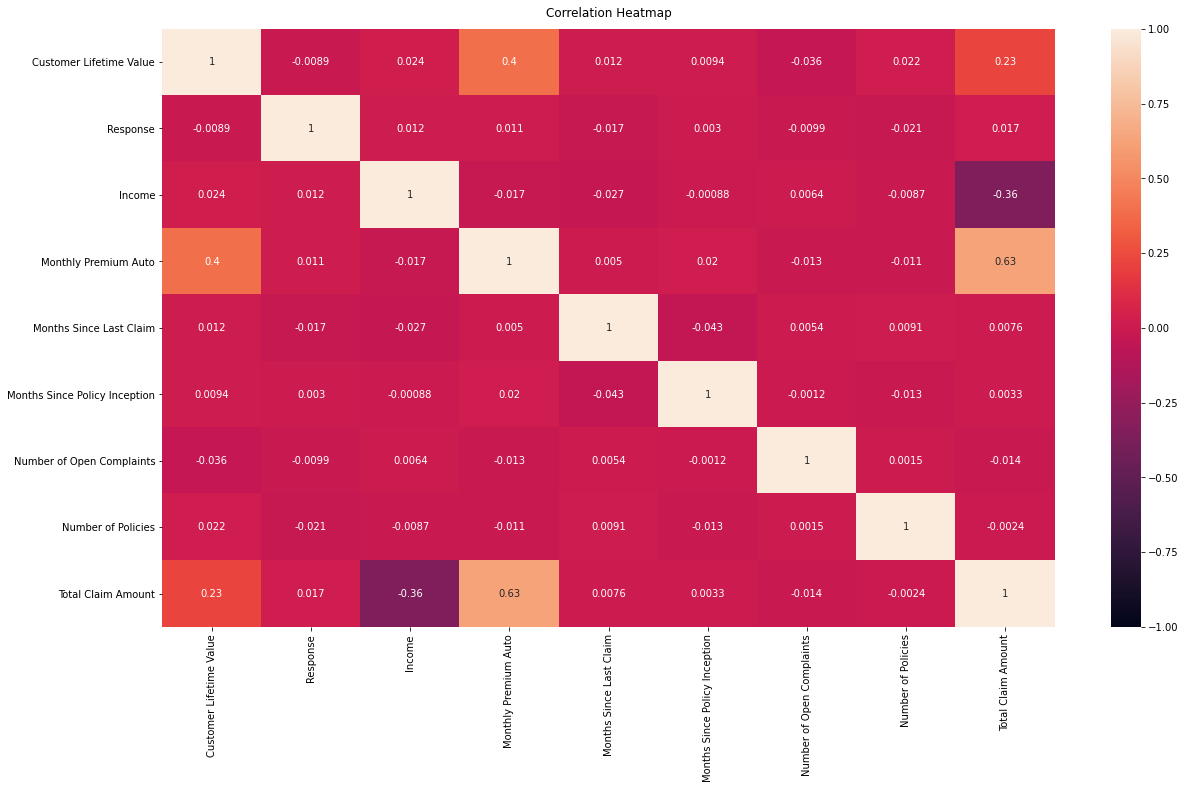

In [144]:
#Checking for correlation (for numerical variables)
corr_matrix = df.corr(method= 'pearson')
#To make it easier to find correlation, it is better to visualize the correlation matrix via a heatmap
plt.figure(figsize=(20, 11))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

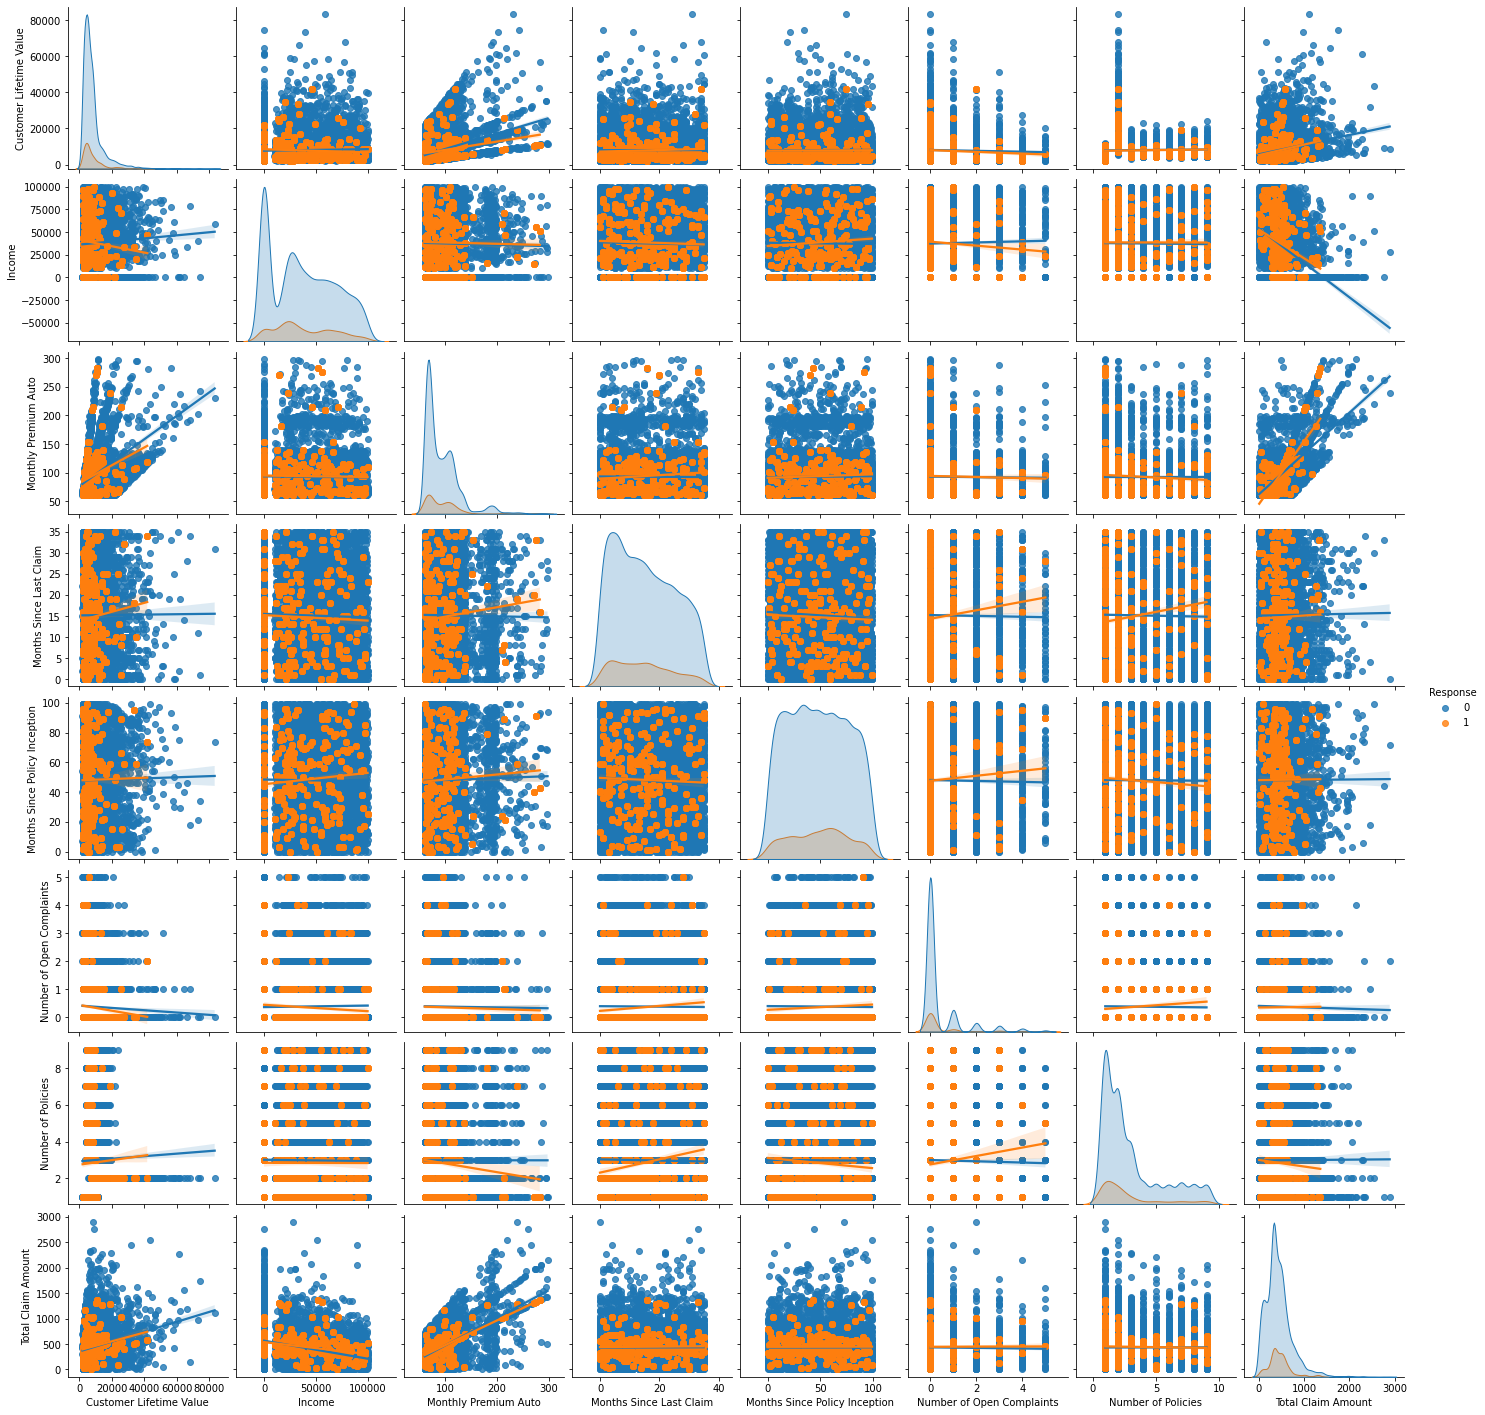

In [145]:
from seaborn import pairplot
new_df = df.copy()
vars = ['Customer Lifetime Value','Income', 'Monthly Premium Auto',
        'Months Since Last Claim', 'Months Since Policy Inception',
        'Number of Open Complaints','Number of Policies','Total Claim Amount']
p = pairplot(
    new_df, vars=vars, hue="Response", kind="reg"
)


## Count number of categories for each object data 

In [149]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Customer             9134
State                   5
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Renew Offer Type        4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

## Engagement rate (accepted) of different offers 

In [151]:
# Get the engagemnt rates per renewal offer type
customers_byoffer = df.loc[df['Response']==1, #count only engaged customers
                                ].groupby(['Renew Offer Type'], #engaged customers grouped by renewal offer type
                                     ).count()['Customer']/df.groupby(['Renew Offer Type']).count()['Customer']

customers_byoffer

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

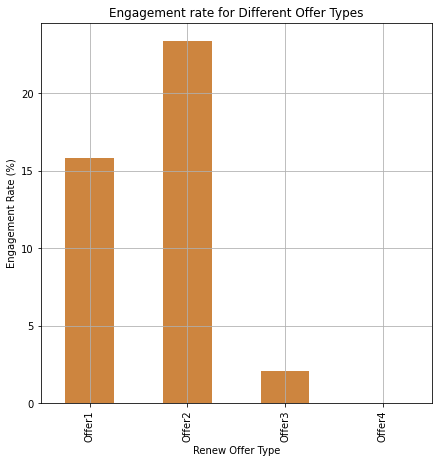

In [213]:
ax = (customers_byoffer*100).plot(kind='bar',color = 'peru', figsize=(7,7),grid=True, title = 'Engagement rate for Different Offer Types')
ax.set_ylabel('Engagement Rate (%)')
plt.show()

Out of the people who were offered respected offers, Offer 2 was the most accepted offer followed by Offer 1.

## Distribution of offer types (not accepted)

In [154]:
# Get the engagemnt rates per renewal offer type
rejected_byoffer = df.loc[df['Response']==0, #count only engaged customers
                                ].groupby(['Renew Offer Type'], #engaged customers grouped by renewal offer type
                                     ).count()['Customer']/df.groupby(['Renew Offer Type']).count()['Customer']

rejected_byoffer

Renew Offer Type
Offer1    0.841684
Offer2    0.766234
Offer3    0.979050
Offer4    1.000000
Name: Customer, dtype: float64

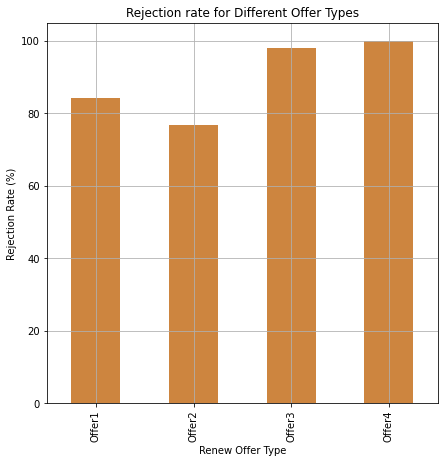

In [212]:
ax = (rejected_byoffer*100).plot(kind='bar',figsize=(7,7),color='peru',grid=True, title = 'Rejection rate for Different Offer Types')
ax.set_ylabel('Rejection Rate (%)')
plt.show()

Out of the people who were offered respected offers,Offers 3 and 4 are almost rejected by majority of the customers 

In [275]:
###Creating a copy of dataframe to create a traget variable so that the response can be shown as yes or not rather than 0 and 1. 
df_copy = df.copy(deep=True)
target = ['Yes' if i == 1 else 'No' for i in df_copy['Response']]
df_copy['Response to Offer'] = target
df_copy.drop('Response', axis=1, inplace=True)

Text(0.5, 1.0, 'Response to Offers based on Different Offer Types')

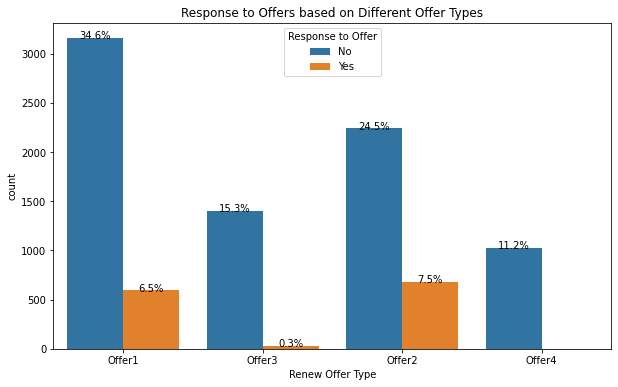

In [282]:
plt.figure(figsize=(10,6)) 
graphs=sns.countplot(x = 'Renew Offer Type', data=df_copy, hue = 'Response to Offer')
for p in graphs.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2       
    y = p.get_y() + p.get_height()+23
    graphs.annotate(percentage, (x, y),ha = 'center', va = 'center')
graphs.set_title("Response to Offers based on Different Offer Types")

The above graph is showing the count for all the consumers. Almost 41% of the customers were offered Offer 1, out of which only 7% accepted it while for Offer 4, all the customers who received it rejected it. Offers 3 and 4 renwal options were provided less to people and almost everyone rejected those. 

## Customer Lifetime Value and Response

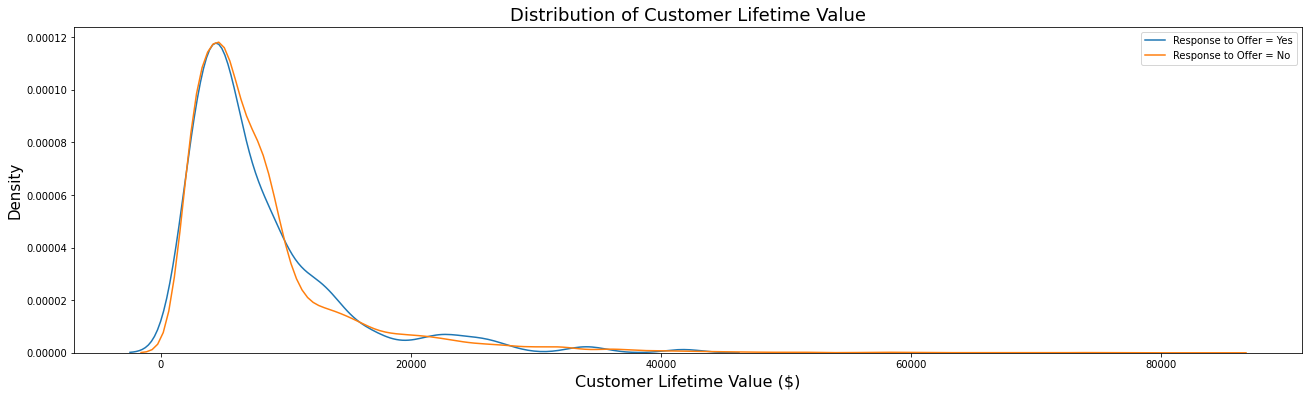

In [283]:
fig = plt.figure(figsize=(22, 6))
sns.kdeplot(df_copy.loc[df_copy['Response to Offer'] == 'Yes', 'Customer Lifetime Value'], label='Response to Offer = Yes')
sns.kdeplot(df_copy.loc[df_copy['Response to Offer'] == 'No', 'Customer Lifetime Value'], label='Response to Offer = No')
plt.xlabel('Customer Lifetime Value ($)', fontsize=16)
plt.ylabel('Density', fontsize=15)
plt.title('Distribution of Customer Lifetime Value', fontsize=18)
plt.legend()

Customer Lifetime Value is not associated with reponse to offers considering that the distribution is almost identical. 

## Distribution of Income for people who accepted and rejected the renewal offer 

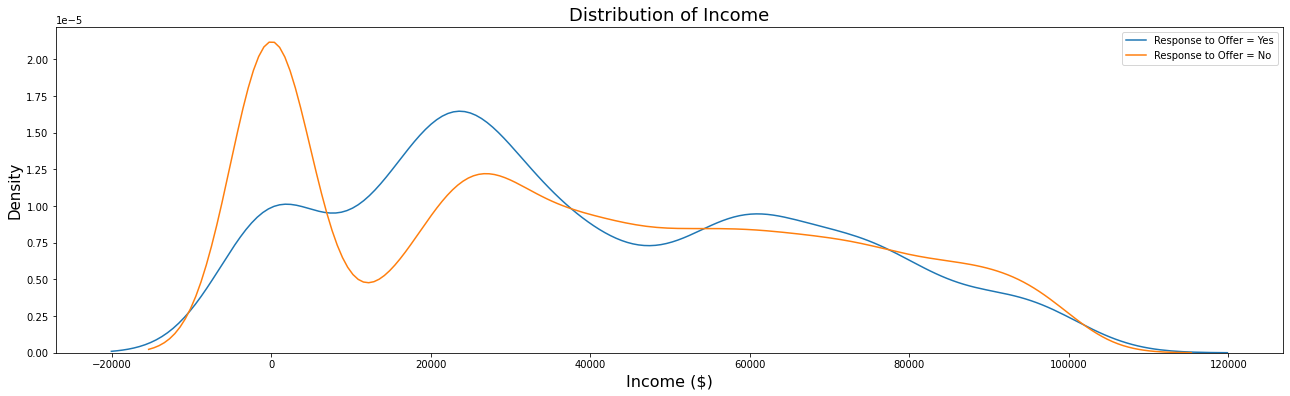

In [252]:
fig = plt.figure(figsize=(22, 6))
sns.kdeplot(df_copy.loc[df_copy['Response to Offer'] == 'Yes', 'Income'], label='Response to Offer = Yes')
sns.kdeplot(df_copy.loc[df_copy['Response to Offer'] == 'No', 'Income'], label='Response to Offer = No')
plt.xlabel('Income ($)', fontsize=16)
plt.ylabel('Density', fontsize=15)
plt.title('Distribution of Income', fontsize=18)
plt.legend()

Majority of the people who have not accepted the renewal offer are in the lower income group. For the people who accepted the renewal offer have relatively more balanced distribution of income. 

## Gender and Customer Lifetime Value

Text(0, 0.5, 'Customer Lifetime Value')

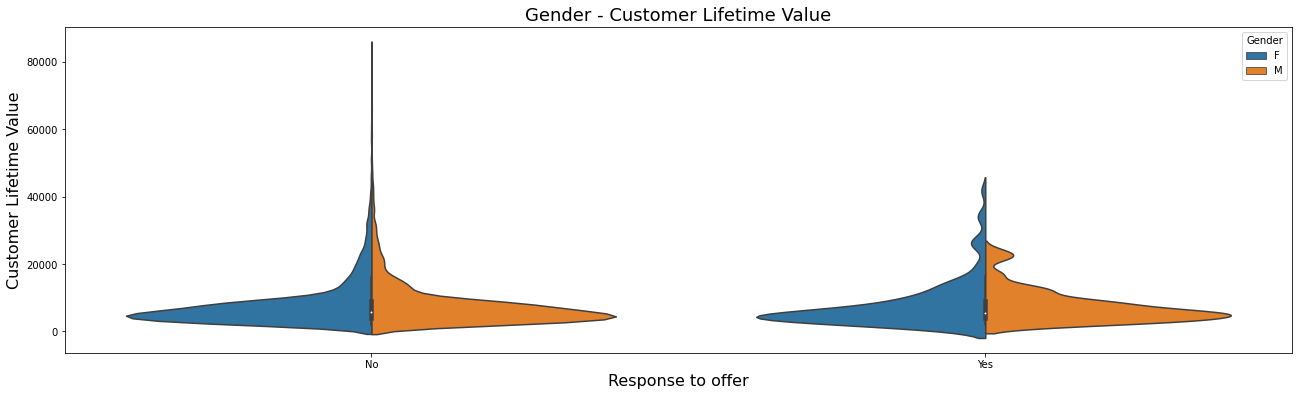

In [253]:
fig = plt.figure(figsize=(22, 6))
sns.violinplot(x="Response to Offer",
               y="Customer Lifetime Value",
               data=df_copy,
               hue="Gender",
               split=True,
               fontsize=16)

plt.title("Gender - Customer Lifetime Value", fontsize=18)
plt.xlabel("Response to offer", fontsize=16)
plt.ylabel("Customer Lifetime Value", fontsize=16)

As can be seen from the plots above, the distribution is quite similar for both genders whether they accepted or rejected the offer. There are more outliers in the customers who did not accept the offers. 

## Employment status and response to offers and Customer Lifetime Value

Text(0.5, 1.0, 'Response to Offers based on Employment Status')

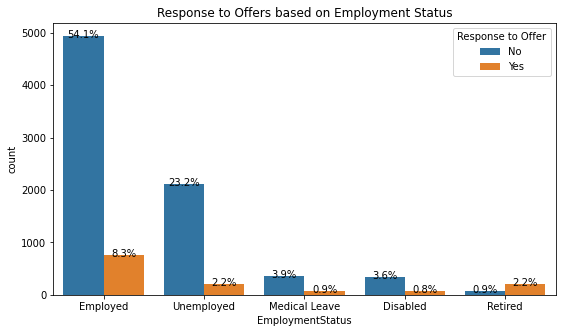

In [284]:
plt.figure(figsize=(9,5)) 
graphs=sns.countplot(x = 'EmploymentStatus', data=df_copy, hue = 'Response to Offer')
for p in graphs.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2       
    y = p.get_y() + p.get_height()+23
    graphs.annotate(percentage, (x, y),ha = 'center', va = 'center')
graphs.set_title("Response to Offers based on Employment Status")

Even though the retired customers make only around 3.1% of all the customers, most of the retired customers are the ones who accepted the response of the customers. While the majority of customers (62.4%) are employed, only 8.3% employed customers accepted the offers.

Text(0.5, 1.0, ' Customer Lifetime Value - Employment Status ')

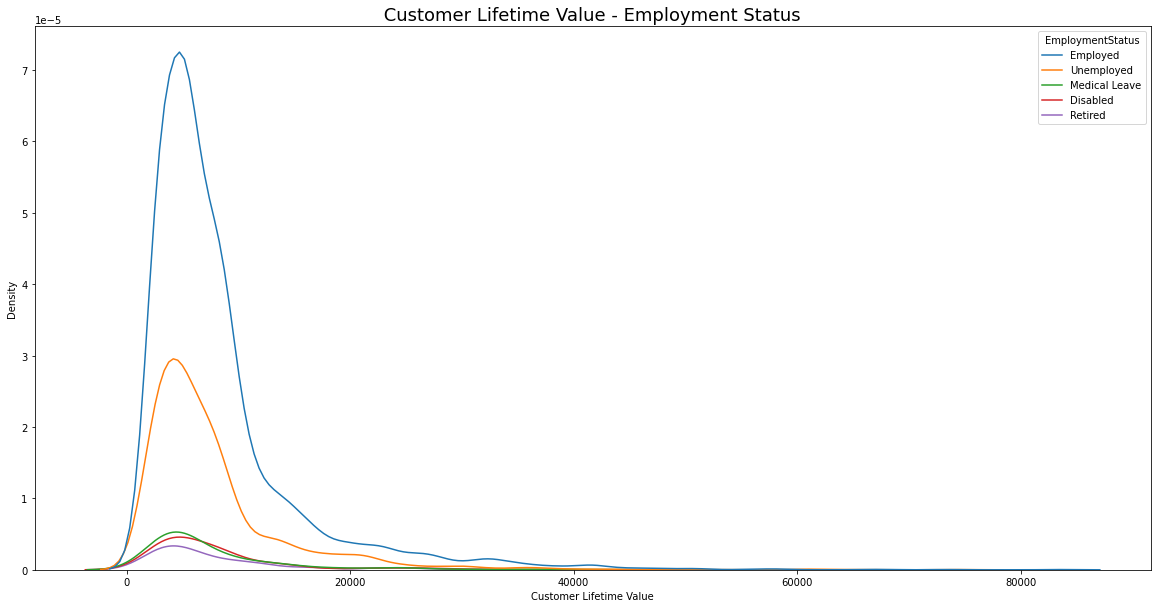

In [285]:
fig = plt.figure(figsize=(20,10)) 
graphs=sns.kdeplot(x = 'Customer Lifetime Value', data=df_copy, hue = 'EmploymentStatus')
graphs.set_title(' Customer Lifetime Value - Employment Status ', fontsize=18)

The distribution of Customer Lifetime vlaue doesn't show any trends for different emplyment status

## Coverage and Response 

Text(0.5, 1.0, 'Response to offers based on Coverage')

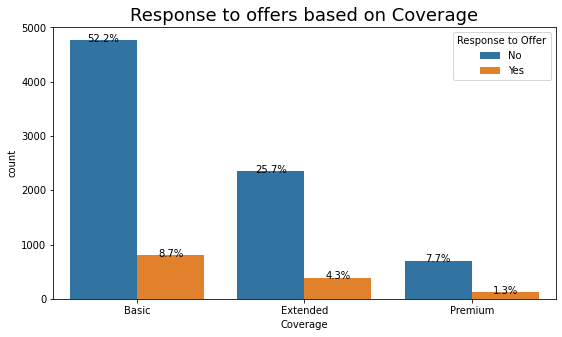

In [286]:
plt.figure(figsize=(9,5)) 
graphs=sns.countplot(x = 'Coverage', data=df_copy, hue = 'Response to Offer')
for p in graphs.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2       
    y = p.get_y() + p.get_height()+25
    graphs.annotate(percentage, (x, y),ha = 'center', va = 'center')
graphs.set_title('Response to offers based on Coverage', fontsize=18)

Text(0.5, 1.0, 'Distribution of Customer Lifetime Value based on Coverage')

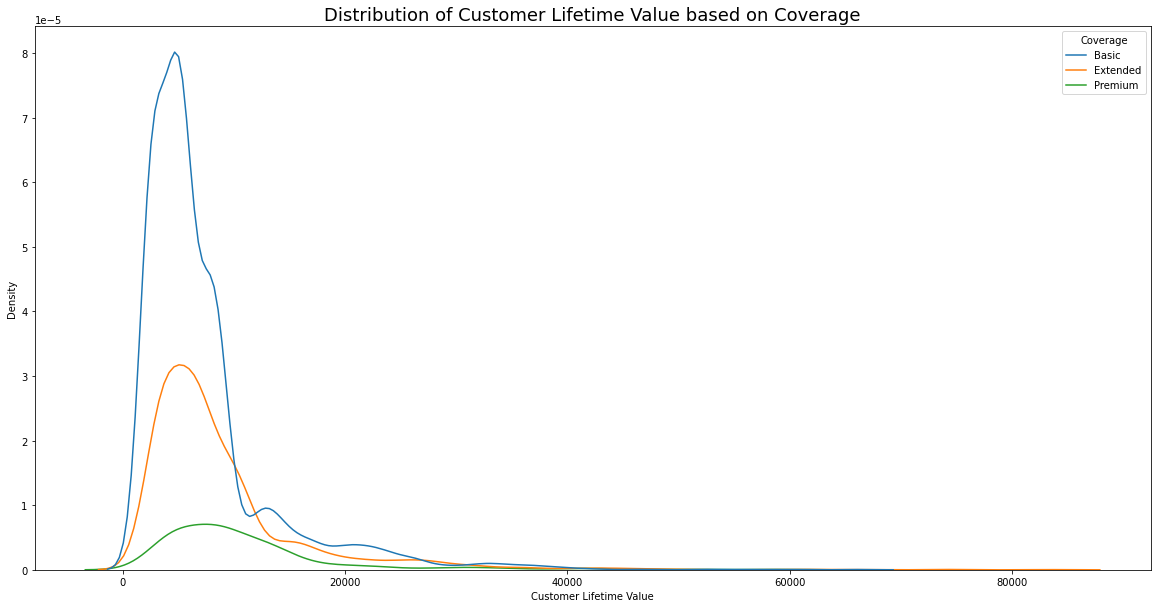

In [287]:
fig = plt.figure(figsize=(20,10)) 
graphs=sns.kdeplot(x = 'Customer Lifetime Value', data=df_copy, hue = 'Coverage')
graphs.set_title('Distribution of Customer Lifetime Value based on Coverage', fontsize=18)

Coverage does not make much difference in people accepting the offers and in the Customer Lifetime Value

## Reponse to Offer and Number of Open Complaints

Text(0.5, 1.0, 'Response to offers based on Number of Open Complaints')

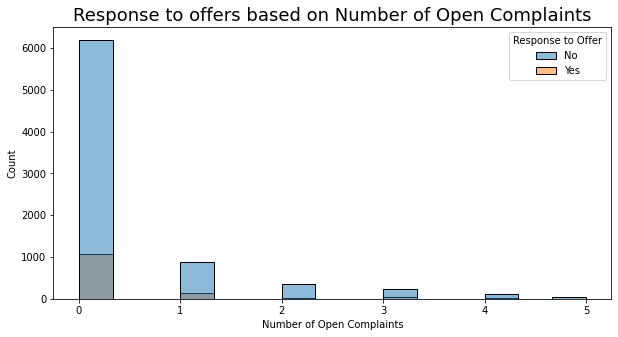

In [288]:
fig = plt.figure(figsize=(10,5)) 
graphs=sns.histplot(x = 'Number of Open Complaints', data=df_copy, hue = 'Response to Offer')
graphs.set_title('Response to offers based on Number of Open Complaints', fontsize=18)

## Response to Offer and Months since Last Claim

Text(0.5, 1.0, 'Response to offers based on Months since Last Claim')

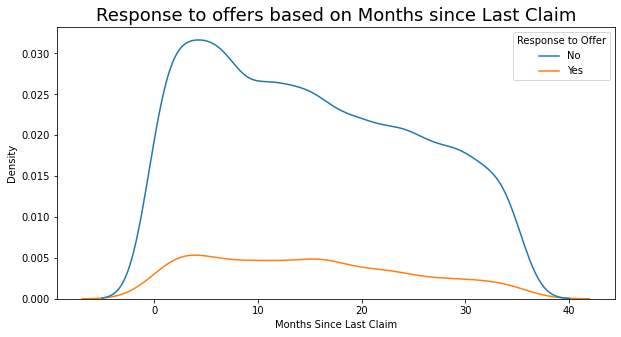

In [289]:
fig = plt.figure(figsize=(10,5)) 
graphs=sns.kdeplot(x = 'Months Since Last Claim', data=df_copy, hue = 'Response to Offer')
graphs.set_title('Response to offers based on Months since Last Claim', fontsize=18)

Months since last Claim do not have a significant impact on the people's decision to accept/ reject the offers

## States and Customer Lifetime Value for the people who accepted the offers

Text(0, 0.5, 'Customer Lifetime Value')

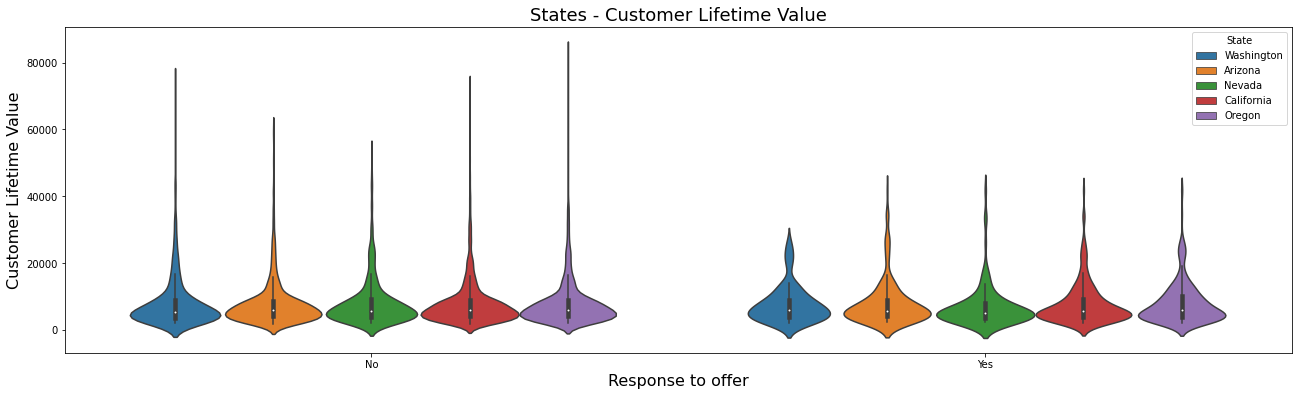

In [272]:
fig = plt.figure(figsize=(22, 6))
sns.violinplot(x="Response to Offer",
               y="Customer Lifetime Value",
               data=df_copy,
               hue="State",
               fontsize=16)

plt.title("States - Customer Lifetime Value", fontsize=18)
plt.xlabel("Response to offer", fontsize=16)
plt.ylabel("Customer Lifetime Value", fontsize=16)

States do not have any impact on the acceptance of offers since the distribution looks identical.

## Policy and Customer Lifetime Value for the people who accepted the offers


Text(0, 0.5, 'Customer Lifetime Value')

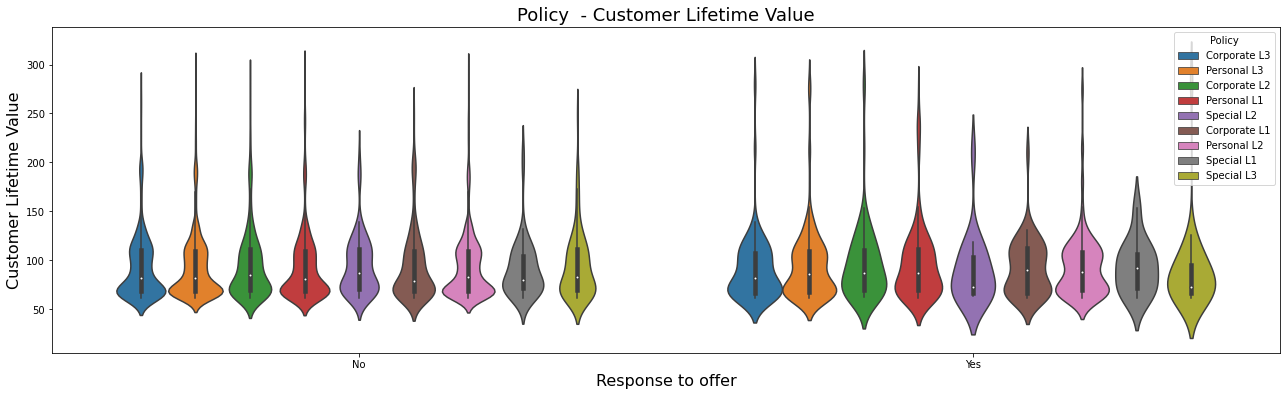

In [290]:
fig = plt.figure(figsize=(22, 6))
sns.violinplot(x="Response to Offer",
               y="Monthly Premium Auto",
               data=df_copy,
               hue="Policy",
               fontsize=16)

plt.title("Policy  - Customer Lifetime Value", fontsize=18)
plt.xlabel("Response to offer", fontsize=16)
plt.ylabel("Customer Lifetime Value", fontsize=16)

Policy type do not have any impact on the acceptance of offers since the distribution looks identical.

## Marital Status and Response to Offers

Text(0.5, 1.0, 'Response to offers based on Marital Status')

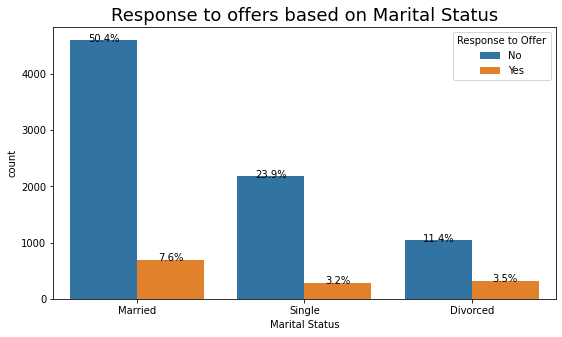

In [291]:
plt.figure(figsize=(9,5)) 
graphs=sns.countplot(x = 'Marital Status', data=df_copy, hue = 'Response to Offer')
for p in graphs.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2       
    y = p.get_y() + p.get_height()+25
    graphs.annotate(percentage, (x, y),ha = 'center', va = 'center')
graphs.set_title('Response to offers based on Marital Status', fontsize=18)

Marital Status is not an imporant factor in people's response to offer

## Total Claim Amount and Response to Offer

Text(0.5, 1.0, 'Distribution of Total Claim Amount')

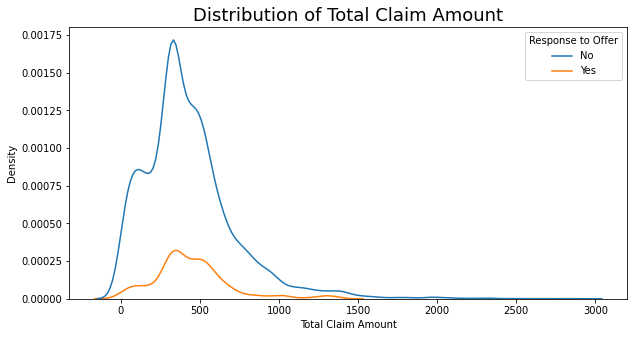

In [294]:
fig = plt.figure(figsize=(10,5)) 
graphs=sns.kdeplot(x = 'Total Claim Amount', data=df_copy, hue = 'Response to Offer')
graphs.set_title('Distribution of Total Claim Amount', fontsize=18)

## Monthly Premium Auto and Response to Offers 

Text(0.5, 1.0, 'Distribution of Monthly Premium Auto')

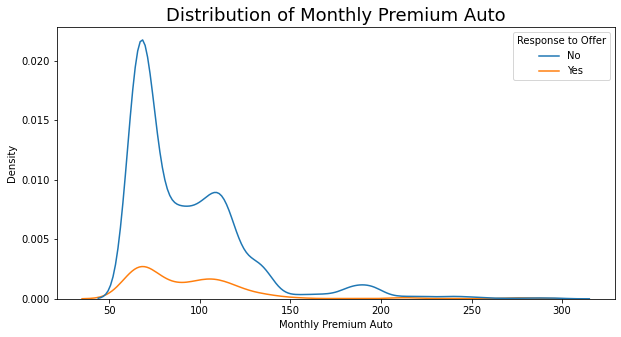

In [296]:
fig = plt.figure(figsize=(10,5)) 
graphs=sns.kdeplot(x = 'Monthly Premium Auto', data=df_copy, hue = 'Response to Offer')
graphs.set_title('Distribution of Monthly Premium Auto', fontsize=18)

There are relatively more people who had higher monthly premium auto who did not accept the renwal offer 